# **Lab 4 : Integration**<br>

Integration is the process of measuring the area under a function. This area actually corresponds to the anti-derivative of the function. For instance, a velocity function $v(t)$ can be obtained as a derivative of a distance function $S(t)$. Inversely, the integration of the velocity function $v(t)$ over a certain time period can give us the distance traveled over that time period. Performing integration analytically is a complex procedure, involving a lot of rules. Computers and calculators perform integration using some sort of numerical method, one of which is the **Simpson's 1/3 rule**.

In today's lab, we will be implementing the **Simpson's 1/3 rule** of integration in python. The **Simpson's 1/3 rule** uses a minimum of 2 segments to divide the entire range of the interval of integration, but we can also define a multiple-segment version of this rule that divides the interval into n equal segments, where n is an even number. Suppose we wish to use the 4-segment Simpson's 1/3 rule to find the distance covered by a rocket from time $t = 8$ to $t = 30$. The velocity function of the rocket is given as $v(t) = 2000ln[ \frac{140000}{140000-2100t} ] - 9.8t)dt$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Task 1
Implement a function that takes time as an argument and returns the velocity based on the given velocity function. Then, complete the following MultiSimpson13() function that takes number of segments n and the time interval (tmin, tmax) as arguments and returns the distance covered within this interval. Your function should also check for the validity of the number of segments.

In [ ]:
def velocity(t):
    return 2000*np.log((140000/(140000 - 2100*t))) - 9.8*t


def MultiSimpson13(n, tmin, tmax):
    h = (tmax - tmin)/n
    res = velocity(tmin) + velocity(tmax)
    for i in range(1, n):
        if(i & 1):
            res += 4*velocity(tmin + i*h)
        else:
            res += 2*velocity(tmin + i*h)
    return (h/3)*res

In [ ]:
print(MultiSimpson13(4, 8, 30))

11061.636137405923


##Task 2
Use your previously implemented MultiSimpson13() function and use increasing number of segments, starting from 2 to 10 and show the relative approximate error at each step. Plot a graph showing the relative approx error vs number of segments. 

In [ ]:
def relative_approx_error(newVal, oldVal):
    return (abs(newVal - oldVal)/newVal)*100

errors = []
distances = []
segList = []
for segments in range(2, 11, 2):
    if segments > 2:
        segList.append(segments)
    temp = MultiSimpson13(segments, 8, 30)
    distances.append(temp)
    print(f'Using {segments} segment Simpson\'s 1/3 rule, distance = {temp}')
    if segments > 2:
        errors.append(relative_approx_error(distances[-1], distances[-2]))

Using 2 segment Simpson's 1/3 rule, distance = 11065.716327732165
Using 4 segment Simpson's 1/3 rule, distance = 11061.636137405923
Using 6 segment Simpson's 1/3 rule, distance = 11061.39610401265
Using 8 segment Simpson's 1/3 rule, distance = 11061.354838090307
Using 10 segment Simpson's 1/3 rule, distance = 11061.3434684075


[4, 6, 8, 10] [0.036885956792994286, 0.0021700099247485547, 0.000373063905352544, 0.00010278753967897225]


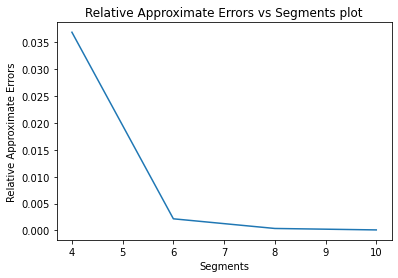

In [ ]:
plt.plot(segList, errors)
print(segList, errors)
plt.title("Relative Approximate Errors vs Segments plot")
plt.xlabel("Segments")
plt.ylabel("Relative Approximate Errors")
plt.show()